# Движение наноспутника в пусковом контейнере

Юдинцев В. В. 2019

_Пример использование языка программирования Python с библиотеками numpy, scipy, sympy, matplotlib для построения и интегрирования уравнений движения наноспутника формата кубсат внутри транспортно-пускового контейнера._

Рассмотрим _простейшую плоскую_ модель движения [наноспутника](https://ru.wikipedia.org/wiki/Кубсат) внутри контейнера.

Пусть наноспутник при движении в контейнере своим ребром $B$, скользит по поверхности направляющей контейнера $B_0D_0$, а ребро $А_0$ контейнера может касаться боковой поверхности наноспутника $DA$.

Наноспутник может двигаться внутри контейнера без соприкосновения с ребром $A_0$, однако до момента выхода из контейнера и пока на наноспутник действует сила пружинного толкателя P, ребро $B$ наноспутника касается поверхности $B_0D_0$. 

![Наноспутник](http://classmech.ru/assets/img/blog/cubesat.png)

На наноспутник действуют сила пружинного толкателя $P$ и силы реакции со стороны транспортно-пускового контейнера $R_A$ и $R_B$.

Предполагаем, что движение наноспутника в контейнере можно разделить на три этапа, которые отличаются набором  ограничений (связей), накладываемых на движение наноспутника: 

1 этап: $P>0$, $R_A>0$, $R_B>0$: на наноспутник действует сила пружинного толкателя, наноспутник в процсессе движения касается контейнера в двух точках ($A_0$ и $B$). В этих точках на спутник действуют силы реакции $R_A$ и $R_B$.  

2 этап: $P>0$, $R_A=0$, $R_B>0$: на наноспутник действует сила пружинного толкателя $P$, наноспутник касается контейнера толко в точке $B$. 

3 этап: $P=0$, $R_A=0$, $R_B=0$: свободное движение по инерции.

Этапы движения показаны на следующем видео:

In [50]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/THv4-rbR3-g" frameborder="0" allow="autoplay; encrypted-media;"></iframe>

## Уравнения движения

Положение наноспутника определяется относительно неподвижной системы координат $Oy_0z_0$, связанной с контейнером. 

Положение определяется тремя параметрами: координатами центра масс наноспутника $y$, $z$ и углом $\beta$ между направляющей конейнера и ребром наноспутника. 

Учитывая изменение в процессе движения спутника количества кинематических связей, ограничивающих его движение, удобней для записи уравнений движения использовать теорему о движении центра масс и теорему об изменении момента количества движения, дополняя эти уравнения необходимыми уравнениями связей.  

Векторная форма уравнений движения центра масс наноспутника имеет вид: 

\begin{equation}\label{eq:1}
    m \vec{a} = \vec{R}_A + \vec{R}_B + \vec{P}
\end{equation}

где $m$ - масса наноспутника, $\vec{R}_A$ - сила реакции, действующая на наноспутник со стороны контейнера, в точке $A$, $\vec{R}_B$ - сила реакции со стороны контейнера, действующая на наноспутник в точке $B$, $\vec{P}$ - сила пружинного толкателя. Полагаем, что эта сила приложена в середине задней стенки наноспутника и направлена вдоль оси $Oz_0$. Трением, действующим на наноспутник при его скольжении внутри контейнера пренебрегаем.

Уравнения движения вокруг центра наноспутника имеет следующий вид:

$$
J \ddot \beta = P (z_c \cos \beta + y_c \sin \beta) - R_A (DA-z_c) - R_B(z_c \cos \beta - (w/2 + y_c)\sin \beta)
$$

где $w = 100$ мм - ширина наноспутника, $y_c>0$, $0 \leq z_c \leq L$ - положение центра масс наноспутника в связанной с ним системой координат: $y_c$ - расстояние от продольной оси наноспутника до центра масс в плоскости перпендикулярной продольной оси, $z_c$ - расстояние от задней стенки наноспутника до центра масс вдоль продольной оси, $J$ - момент инерции наноспутника. 

В правой части последнего уравнения записана сумма моментов относительной центра масс от силытолкателя, и двух сил реакции.

Спроецировав векторное уравнение движения центра масс на оси системы координат $Oy_0z_0$, вместе с уравнением движения вокруг центра масс, получим систему трех дифференциальных уравнений: 

$$
\left\{
\begin{aligned}
& m \ddot y = R_A \cos \beta - R_B \\
& m \ddot z = P + R_A \sin \beta \\
& J \ddot \beta = P (z_c \cos \beta + y_c \sin \beta) - R_A (DA-z_c) - R_B(z_c \cos \beta - (w/2 + y_c)\sin \beta) \\
\end{aligned}
\right.
$$

Матричная форма этой системы уравнений:

$$
\begin{pmatrix}
m & 0 & 0 & - \cos \beta & 1 \\
0 & m & 0 & - \sin \beta & 0 \\
0 & 0 & J & DA-z_c & z_c \cos \beta - (w/2 + y_c)\sin \beta 
\end{pmatrix}
\begin{pmatrix}
\ddot y \\
\ddot z \\
\ddot \beta \\
R_A \\
R_B 
\end{pmatrix} = \begin{pmatrix} F_y \\ F_z \\ M_x\end{pmatrix}
$$ 

В полученные три дифференциальных уравнения входят неизвестные силы реакции $R_A$ и $R_B$, которые можно определить, дополнив полученную систему уравнений уравнениями связей. Перед записью уравнений связей определим закон изменения силы толкателя, действующей на наноспутник.

## Сила пружинного толкателя

Сила пружиного толкателя P, которая выталкивает наноспутник из контейнера, зависит от положения наноспутника внутри контейнера.

Будем считать, что сила пружинного толкателя линейно зависит от координаты $z_B$ точки $B$ до тех пор пока перемещение этой точки не превысит максимальной величины хода толкателя h:

$$
P =
\begin{cases}
P_0 - \frac{P_0-P_k}{h} \cdot z_b & z_b \leq h \\
0 & z_b > h
\end{cases}
$$

где $P_0$ - начальное усилие толкателя, $P_k$ - конечное усилие толкателя, $h$ - ход толкателя или максимальнео его перемещение (выдвижение) от начального положения. Пока $z_b \leq h$ толкатель разгоняет наноспутник, при $z_b>h$ толкатель перестет действовать и наноспутник продолжает движение "по инерции". 

Координата $z_B$ выражается через положение центра масс и угол поворота наноспутника следующим образом:

$$
    z_B = z + y_c \sin \beta - z_c \cos \beta + (w/2)\cdot \sin \beta  
$$



## Уравнения связей

Систему уравнений движения необходимо дополнить двумя уравнениями связей, которые отражают тот факт, что движение наноспутника внутри контейнера ограничено направляющими. 

### Уравнение связи для точки В

Если точка $B$ скользит по линии $B_0D_0$, то её координата $y_B$ остаётся постоянной:

$$
y_B = w + d
$$

Выражая координату $y_B$ через положение центра масс и угол поворота наноспутника, получим уравнение связи:

$$
\boxed{y + y_c \cos \beta + z_c \sin \beta + w/2 \cos \beta = w + d}        
$$

Это уравнение отражает связь между координатой $y$ центра масс наноспутника и углом его поворота. Запишем это уравнение связи в виде: 

$$
    f_B = 0,
$$

где 

$$
    f_B = y + z_c \sin \beta + (w/2 + y_c) \cos \beta - w - d 
$$

### Уравнение связи для точки А

Если наноспутник скользит своей поверхностью DA по точке $A_0$ контейнера, то в этом случае должно выполняеться условие: 

$$
    w \cos \beta + DA' \sin \beta = w + d,   
$$    

при этом координата $z$ точки $A'$ (точки контакта) должна быть равна известному расстоянию $OA_0$:

$$
    z_A' = z_B - w \sin \beta + DA' \cos \beta = OA_0  
$$

С учетом последнего выражения, уравнение связи для точки А' примет вид:

$$
    w \cos \beta + \frac{OA_0 - z_B + w \sin \beta}{\cos \beta} \sin \beta = w + d
$$

Подставляя, полученное выше выраженеи для $z_B$, получим:

$$
    \boxed{w \cos^2 \beta + (OA_0 - z + z_c \cos \beta + (w/2-y_c) \sin \beta) \sin \beta = (w + d) \cos \beta}
$$

или 

$$
    f_A = 0
$$

где 

$$
    f_A = w \cos^2 \beta + [OA_0 - z + z_c \cos \beta + (w/2-y_c) \sin \beta] \sin \beta - (w + d) \cos \beta 
$$

Длину $OA_0$ определим из уравнения, описывающего начальное положение наноспутника внутри контейнера. Считаем, что в начальном положении $z_B = 0$, а ребро $A$ наноспутника совпадает с ребром $A_0$ контейнера, тогда:

$$
    OA_0 = L \cos \beta_0 - w \sin \beta_0
$$

при этом

$$
    w \cos \beta_0 + L \sin \beta_0 = w + d
$$

Последнее уравнение позволяет определить начальное значение угла $\beta_0$. Далее для обозначения длины $OA_0$  используется буква $L_d$

$$
    L_d = OA_0
$$

## Дифференциально-алгебраические уравнения

Для интегрирования уравнений движения совместно с уравнениями связей продифференцируем дважды уравнения связей, приводя их к линейным уравнениям относительно ускорений. В рассматриваемом случае уравнения связей явно не зависят от времени: 

$$
    f_A = f_A(y(t),z(t),\beta(t)) = 0, \quad  f_B = f_B(y(t),z(t),\beta(t)) = 0,
$$

поэтому выражение для второй производной уравнения связи $f_A =0$ будет иметь вид 

$$
   \frac{d^2f_A}{dt^2} =  \frac{\partial f_A}{\partial y} \ddot y + \frac{\partial f_A}{\partial z} \ddot z + \frac{\partial f_A}{\partial \beta} \ddot \beta + \Phi_A = 0 
$$

где 

$$
\Phi_A = \frac{\partial^2 f_A}{\partial y^2} \dot y^2 + \frac{\partial^2 f_A}{\partial z^2} \dot z^2 + \frac{\partial^2 f_A}{\partial \beta^2} \dot \beta^2 + 2 \frac{\partial^2 f_A}{\partial y \partial z} \dot y \dot z + 2 \frac{\partial^2 f_A}{\partial y \partial \beta} \dot y \dot \beta + 2 \frac{\partial^2 f_A}{\partial z \partial \beta} \dot z \dot \beta
$$

Уравнение связи можно записать в следующем матричном виде

$$
    Q_A \ddot{q} = \Phi_A
$$

или

$$
\begin{bmatrix} Q_{Ay} & Q_{Az} & Q_{A\beta} \end{bmatrix} \cdot \begin{bmatrix} \ddot y \\ \ddot z \\ \ddot \beta \end{bmatrix} = \Phi_A 
$$

где 

$$
Q_{Ay} =  \frac{\partial f_A}{\partial y}, \quad Q_{Az} =  \frac{\partial f_A}{\partial z}, \quad Q_{A\beta} =  \frac{\partial f_\beta}{\partial \beta}
$$

Дополнив уравнения движения уравнениями связей для точек А и В получим систему дифференциально-алгебраических уравнений:

$$
\begin{pmatrix}
m & 0 & 0 & - \cos \beta & 1 \\
0 & m & 0 & - \sin \beta & 0 \\
0 & 0 & J & DA-z_c & z_c \cos \beta - (w/2 + y_c)\sin \beta  \\
Q_{Ay} & Q_{Az} & Q_{A\beta} & 0 & 0 \\
Q_{By} & Q_{Bz} & Q_{B\beta} & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
\ddot y \\
\ddot z \\
\ddot \beta \\
R_A \\
R_B \\
\end{pmatrix} = \begin{pmatrix} F_y \\ F_z \\ M_x \\ \Phi_A \\ \Phi_B  \end{pmatrix}
$$ 

Начальные условия также должны удовлетворять уравнениям связей:

$$
    ({f_A})_{t=0} = 0, \quad \left(\frac{d f_A}{dt}\right)_{t=0} = 0, \quad ({f_B})_{t=0} = 0, \quad \left(\frac{d f_B}{dt}\right)_{t=0} = 0, 
$$

### Включение и выключение связей

Связи, ограничиваючие движение наноспутника, являются неудерживающими, поэтому в процессе интегрирования уравнений движения необходимо контролировать значения сил реакций в точках контакта и при изменении знака силы "выключать" соответсвующее этой реакции уравнение связи. 

Удобней всего делать это "выключение" заменой исходного уравнения связи. Например, пока $R_A>0$ используем уравнение связи:

$$
\begin{bmatrix} Q_{Ay} & Q_{Az} & Q_{A\beta} \end{bmatrix} \cdot \begin{bmatrix} \ddot y \\ \ddot z \\ \ddot \beta \end{bmatrix} = \Phi_A 
$$

а при $R_A = 0$ "выключаем" связь, заменяя уравнение связи на уравнение  

$$
R_A = 0
$$

В этом случае система уравнений движения примет вид:

$$
\begin{pmatrix}
m & 0 & 0 & - \cos \beta & 1 \\
0 & m & 0 & - \sin \beta & 0 \\
0 & 0 & J & DA-z_c & z_c \cos \beta - (w/2 + y_c)\sin \beta  \\
0 & 0 & 0 & 1 & 0 \\
Q_{By} & Q_{Bz} & Q_{B\beta} & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
\ddot y \\
\ddot z \\
\ddot \beta \\
R_A \\
R_B \\
\end{pmatrix} = \begin{pmatrix} F_y \\ F_z \\ M_x \\ 0 \\ \Phi_B  \end{pmatrix}
$$ 

Это система уравнений движения второго этапа: этапа движения при котором наноспутник касается контейнеро только точкой $B$. На втором этапе контролируется величина реакции $R_B$ и при $R_B=0$ выполняется переход на третрий этап - этап свободного движения, который описывается системой

$$
\begin{pmatrix}
m & 0 & 0 & - \cos \beta & 1 \\
0 & m & 0 & - \sin \beta & 0 \\
0 & 0 & J & DA-z_c & z_c \cos \beta - (w/2 + y_c)\sin \beta  \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
\ddot y \\
\ddot z \\
\ddot \beta \\
R_A \\
R_B \\
\end{pmatrix} = \begin{pmatrix} F_y \\ F_z \\ M_x \\ 0 \\ 0  \end{pmatrix}
$$ 

## Программа

In [48]:
# Положение центра масс (yc, zc), ширина наноспутника (w), время (t)
yc, zc, w, t = sp.symbols('y_c z_c w t')

# Начальное и конечное усилие толкателя и его ход
P0, Pk, h = sp.symbols('P_0 P_k h')

# Положение центра масс и угол поворота наноспутника -- это функции времени
y    = sp.Function('y')
z    = sp.Function('z')
beta = sp.Function('beta')

# Координата z точки B
zb = z(t) + yc*sp.sin(beta(t)) - zc*sp.cos(beta(t)) + w*sp.sin(beta(t))/2  

# Сила, действующая на наноспутник, зависящая от zb
P = sp.Piecewise( (P0-(P0-Pk)*zb/h, zb <= h), (0, zb>h) )

In [51]:
# Длина наноспутника (L), максимальный зазор между контейнером и наноспутником (d), начальный угол (beta0)
L, d, beta0 = sp.symbols('L d beta_0')

# Длина контейнера -- расстояние OA_0
Ld = L*sp.cos(beta0) - w*sp.sin(beta0) 

In [52]:
# Масса и момент инерции наноспутника
m, J = sp.symbols('m, J')

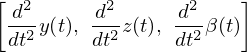

In [53]:
# Вектор обобщенных координат
q  = [y(t), z(t), beta(t)]

# Вектор обобщенных скоростей (производная от q)
dq = [sp.diff(var,t) for var in q]

# Вектор обобщенных ускорений (производная от dq)
d2q = [sp.diff(var,t) for var in dq]
d2q

### Силы

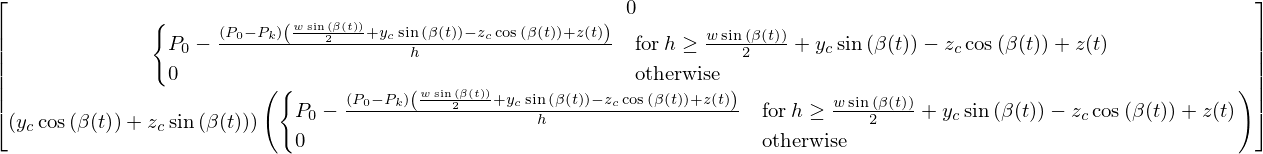

In [54]:
# Столбец [Fy Fz Mx] -- первые три строки правой части уравнений движения
FyzMx = sp.Matrix([0,P,P*(zc*sp.sin(beta(t)) + yc*sp.cos(beta(t)))]) 
FyzMx

### Уравнения связей

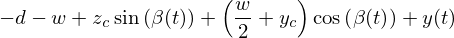

In [55]:
# Уравнение связи для точки В
f_B = y(t) + zc * sp.sin(beta(t)) + (w/2 + yc)*sp.cos(beta(t)) - w - d
f_B

In [56]:
# Уравнение связи для точки А
f_A = w*sp.cos(beta(t))**2 + (Ld-z(t)+zc*sp.cos(beta(t))+0*(w/2-yc)*sp.sin(beta(t)))*sp.sin(beta(t))-(w+d)*sp.cos(beta(t))
f_A

In [57]:
# Вторые производные уравнений связи
d2f_B = sp.diff(f_B,t,2)
d2f_A = sp.diff(f_A,t,2)

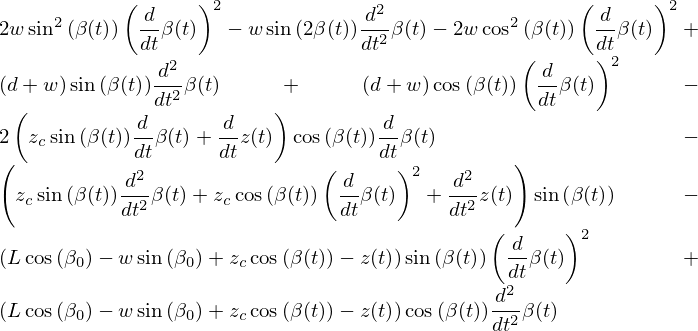

In [58]:
# ...выглядят эти производные довольно громоздко даже после попытки упрощения (метод simplify)
d2f_A.simplify()

Коэффициенты при вторых производных обобщенных координат в уравнении связи $d^2f_A/dt^2 = 0$. Другими словами, матрица-строка $Q_A = [Q_{Ay}, Q_{Az}, Q_{A\beta}]$:

In [59]:
QA = [ d2f_A.expand().coeff(var) for var in d2q ]
QA

Коэффициенты при вторых производных обобщенных координат в уравнении связи $d^2f_B/dt^2 = 0$ -- матрица-строка $Q_B = [Q_{By}, Q_{Bz}, Q_{B\beta}]$:

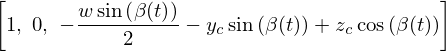

In [60]:
QB = [ d2f_B.expand().coeff(var) for var in d2q ]
QB

В правую часть уравнений движения пойдут все слагаемые, в которые не ходят вторые производные обобщенных координат. Используем для этого метод [as_independent](https://docs.sympy.org/latest/modules/core.html#sympy.core.expr.Expr.as_independent). Эти слагаемые составляют $\Phi_B$:

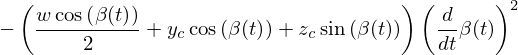

In [61]:
Phi_B = d2f_B.expand().as_independent(*d2q)[0].simplify()
Phi_B

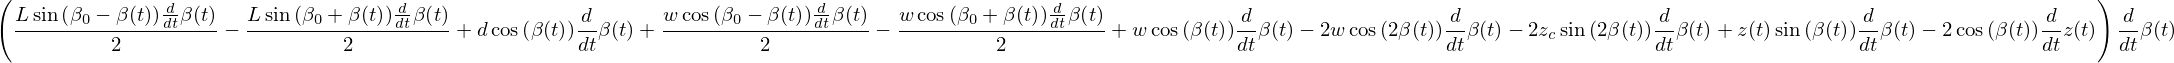

In [62]:
Phi_A = d2f_A.expand().as_independent(*d2q)[0].simplify()
Phi_A

## Переход от символьных выражений к их числовым значениям (подстановка)

В полученных выше аналитических выражениях при численном интегрировании необходимо выполнять замены символов их соответсвующими числовыми значениями. Для замены можно использоваться метод subs выражения sympy, например, для подстановки в выражение Phi_B значений $w = 0.1$ и $y_c=0$ можно вызвать метод subs, передав ему список замен:

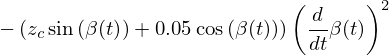

In [63]:
Phi_B.subs([ [w, 0.1], [yc, 0.0] ])

В эту же функцию можно передать словарь:

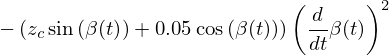

In [64]:
Phi_B.subs({w: 0.1, yc: 0.0})

Наиболее быстрый способ -- использование функции [lambdify](https://docs.sympy.org/latest/modules/utilities/lambdify.html). Возьмем для примера выражение Phi_B, которое зависит от угла поврота, угловой скорости наноспутника и параметров w, yc, zc

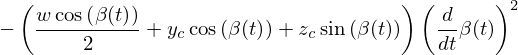

In [65]:
Phi_B

При помощи функции lambdify определим функцию, которая будет вычислять значение этого выражения для заданных числовых параметров. Первый аргумент функции lambdify -- список символов, которые содержаться в вычисляемом выражении, второй аргумент -- само символьное выражение.

In [66]:
n_Phi_B = lambdify( [beta(t), sp.diff(beta(t),t), w, yc, zc], Phi_B )

Результатом работы lambdify является объект типа функция, которую можно вызвать с заданными числовыми значениями

In [67]:
n_Phi_B(0.1,0.1,0.01,0.1,0.1)

Для удобства, чтобы вручную не перечислять параметры выражений, определим список, который будет включать в себя и вектор состояния наноспутника $q=(y,z,\beta,\dot{y},\dot{z},\dot{\beta})$ и его параметры. Этот список будет списком аргументов всех вычисляемых функций, которые будут построены на основе символьных выражений при помощи [lambdify](https://docs.sympy.org/latest/modules/utilities/lambdify.html)

In [68]:
# Определим список параметров наноспутника  

# Наноспутника типоразмера 3U массой 3 кг, с центром масс, 
# смещенным на 10 мм от продольной оси и на 50 мм от середины к толкателю
# Максимальный зазор между наноспутником и контейнером 1 мм
# Толкатель работает на ходе 200 мм
params = {m: 3.0, J: 0.021, L: 0.340, w: 0.100, d: 0.001, yc: 0.010, zc: 0.340/2.0 - 0.05, P0: 7, Pk: 2, h: 0.220}


def get_q0(params):
    '''
    Функция, определяющая начальное положение и угол поворота контейнера 
    для заданной длины L, ширины w 
    и максимального зазора d между контейнером и наноспутником,  
    полагая что в начальный момент точка B совпадает с точной B0, а точка А с точкой А0
    '''
    f = (w*sp.cos(beta0)+L*sp.sin(beta0) - w - d).subs(params)    
    b0 = optimize.root(lambda x: f.subs({beta0:x}), 0.0, tol=1e-8).x[0]
    y0 = ((w+d) - 0.5*w*np.cos(b0)-zc*np.sin(b0)-yc*np.cos(b0)).subs(params)
    z0 = (-0.5*w*np.sin(b0)+zc*np.cos(b0)-yc*np.sin(b0)).subs(params)
    return [y0, z0, b0]


# Вектор начальных условий, зависящий от параметров наноспутника и контейнера
q0 = get_q0(params)
# Добавим к этому списку нулевые начальные скорости
q0.extend([0.0,0.0,0.0])
# Добавим в словарь параметров вычисляемое значение beta_0
params[beta0] = q0[2]

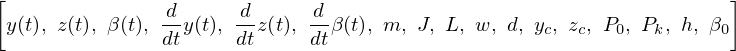

In [69]:
# а теперь определим объединенный список переменных состояния и параметров 
state_and_params = list([*q,*dq,*params.keys()])
state_and_params

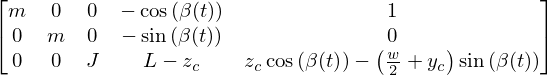

In [70]:
# Первые три строки матрицы коэффициентов правой части уравнений движения
# Символьное выражение sympy (матрица)
mass_matrix = sp.Matrix([[m, 0, 0, -sp.cos(beta(t)), 1],
                         [0, m, 0, -sp.sin(beta(t)), 0],
                         [0, 0, J, L-zc, zc*sp.cos(beta(t))-(w/2+yc)*sp.sin(beta(t))]])

# Создаем функцию-вычислитель для этого блока матрицы
n_mass_matrix = lambdify(state_and_params, mass_matrix)

# Исходное символьное выражение
mass_matrix

In [71]:
# Вычисляем значение mass_matrix для конкретных значений
# Для примера передаем в функцию n_mass_matrix вектор начального состояния наноспутника q0, определенный выше, 
# и значения параметров  
n_mass_matrix(*[*q0,*params.values()])

array([[ 3.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -9.99995671e-01,  1.00000000e+00],
       [ 0.00000000e+00,  3.00000000e+00,  0.00000000e+00,
        -2.94244971e-03,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.10000000e-02,
         2.20000000e-01,  1.19822934e-01]])

In [72]:
# Матрица коэффициентов уравений связей 
Q_matrix = sp.Matrix([QA, QB])
# и её вычисляемое выражение 
n_Q_matrix = lambdify(state_and_params, Q_matrix)

In [73]:
# Матрица правых частей уравнений связей
Phi_matrix = sp.Matrix([-Phi_A, -Phi_B])
# вычислитель
n_Phi_matrix = lambdify(state_and_params, Phi_matrix)

In [74]:
# Первые три строки матрицы-столбца правой части (активные силы и момент, действующие на наноспутник)
n_FyzMx = lambdify(state_and_params,FyzMx)

# Координата z точки B
n_zb = lambdify(state_and_params, zb)

Собираем матрицу коэффицентов левой части дифференциальных уравнений и матрицу-столбец правой части

In [75]:
def get_A_matrix(t, qt, params, stage):
    A = np.zeros((5,5),dtype=float)
    A[0:3,:]   = n_mass_matrix(*[*qt,*params.values()])
    A[3:5,0:3] = n_Q_matrix(*[*qt,*params.values()])
    if stage == 2:
        # RA = 0
        A[3,:] = 0
        A[3,3] = 1       
    if stage == 3:
        # RA = 0 и RB = 0
        A[3,:] = 0
        A[4,:] = 0
        A[4,4] = 1       
        A[3,3] = 1    
    return A
    
def get_B_matrix(t, qt, params, stage):
    B = np.zeros((5,1), dtype=float)
    B[0:3] = n_FyzMx(*[*qt,*params.values()])
    B[3:5] = n_Phi_matrix(*[*qt,*params.values()])    
    if stage == 2:
        # RA = 0
        B[3] = 0 
    if stage==3:
        # RA = 0 и RB = 0
        B[3] = 0
        B[4] = 0 
    return B    

## Численное интегрирование

#### Функция правых частей дифференциальных уравнений

In [76]:
def dydt(t,y):
    A = get_A_matrix(t, y, params, STAGE)
    B = get_B_matrix(t, y, params, STAGE)
    # Реашем систему линейных уравнений
    X = linalg.solve(A,B.flatten())        
    res = np.zeros(len(y), dtype=float)
    # копируем скорости
    res[0:3] = y[3:6]
    # записываем ускорения    
    res[3:6] = X[0:3]
    return res

#### Функции для остановки интегрирования при выполнении некоторых условий

In [77]:
def Ra_eq_0(t, y):
    # Функция-"детектор", передаваемая в интегратор (параметр events), 
    # для остановки процесса интегрирования    
    # при Ra = 0 -- переход от этапа движения 1 к этапу 2
    A = get_A_matrix(t, y, params, STAGE)    
    B = get_B_matrix(t, y, params, STAGE)
    X = linalg.solve(A,B.flatten())   
    return X[3]

# функция-детектор активна
Ra_eq_0.terminal  = True

# функция определяется условие Ra = 0 при убывании Ra
Ra_eq_0.direction = -1

def Rb_eq_0(t, y):
    # Функция-"детектор", передаваемая в интегратор (параметр events), 
    # для остановки процесса интегрирования    
    # при Rb = 0 -- переход от этапа движения 2 к этапу 3
    A = get_A_matrix(t, y, params, STAGE)    
    B = get_B_matrix(t, y, params, STAGE)
    X = linalg.solve(A,B.flatten())      
    return X[4]

# функция определяется условие Rb = 0 при убывании Rb
Rb_eq_0.direction = -1
# функция-детектор активна
Rb_eq_0.terminal  = True

In [86]:
STAGE = 1
# Интегрируем пока Ra > 0
sol_1 = solve_ivp(dydt, [0, 0.5], q0, events = [Ra_eq_0], 
                  rtol = 1e-6, method="LSODA",minstep=0.01)

STAGE = 2
# Интегрируем пока Rb > 0
sol_2 = solve_ivp(dydt, [sol_1.t[-1], sol_1.t[-1]+0.5], sol_1.y[:,-1], events = [Rb_eq_0], 
                  rtol = 1e-6, method="LSODA", minstep=0.01)

STAGE = 3
# Свободное движение наноспутника
sol_3 = solve_ivp(dydt, [sol_2.t[-1], sol_2.t[-1]+0.5], sol_2.y[:,-1], 
                  rtol = 1e-6, method="LSODA", minstep=0.01)

#### Зависимость линейной скорости наноспутника от времени

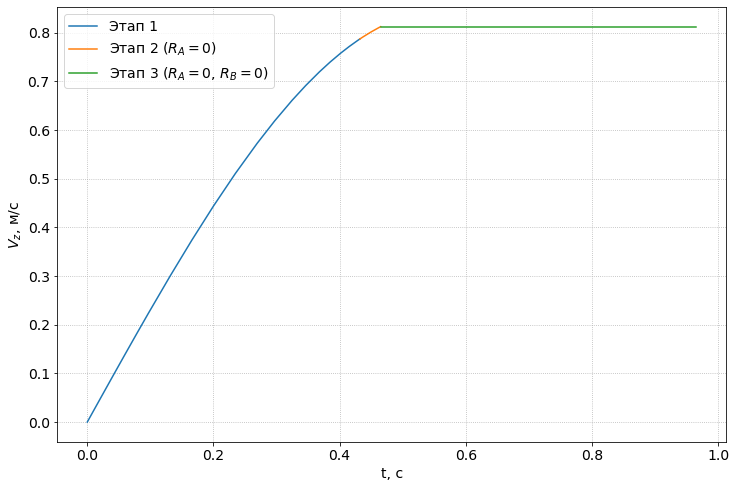

In [87]:
plt.plot(sol_1.t, sol_1.y[4]);
plt.plot(sol_2.t, sol_2.y[4]);
plt.plot(sol_3.t, sol_3.y[4]);
plt.xlabel('t, c');
plt.ylabel('$V_z$, м/с');
plt.grid(linestyle=':')
plt.legend(['Этап 1','Этап 2 ($R_A=0$)','Этап 3 ($R_A=0$, $R_B=0$)']);

#### Зависимость угловой скорости наноспутника от времени

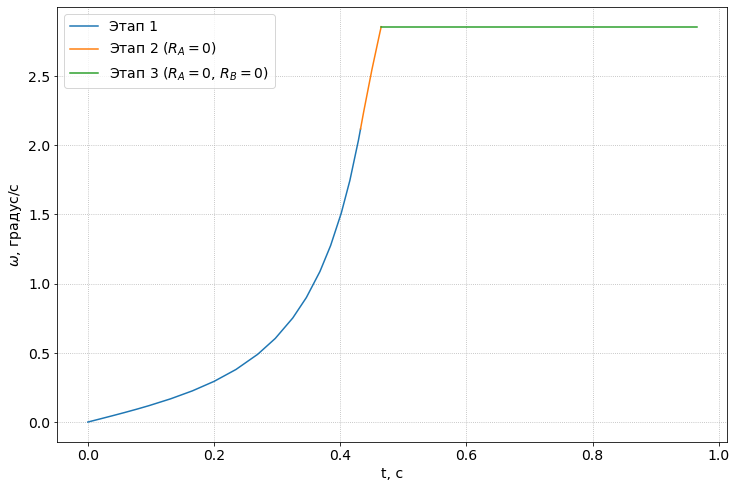

In [88]:
plt.plot(sol_1.t, sol_1.y[5]*180/np.pi);
plt.plot(sol_2.t, sol_2.y[5]*180/np.pi);
plt.plot(sol_3.t, sol_3.y[5]*180/np.pi);
plt.xlabel('t, c');
plt.ylabel('$\omega$, градус/с');
plt.grid(linestyle=':')
plt.legend(['Этап 1','Этап 2 ($R_A=0$)','Этап 3 ($R_A=0$, $R_B=0$)']);

#### Проверяем уравнения связей

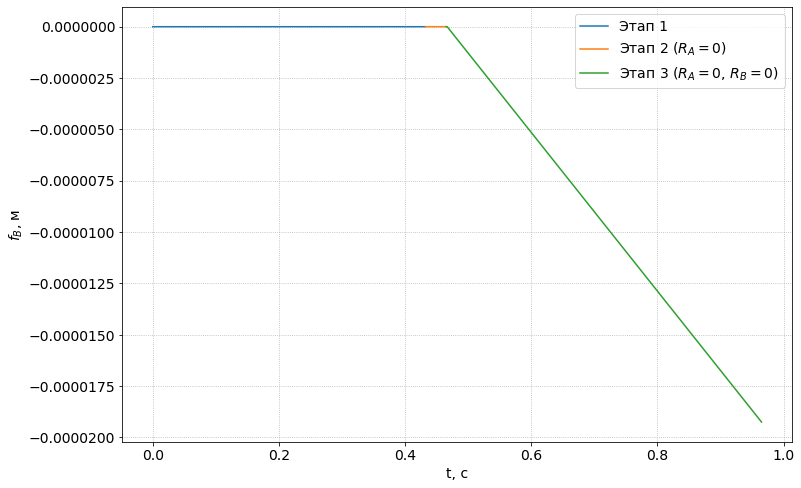

In [89]:
n_f_B=lambdify(state_and_params, f_B)
sol_f_B = [ [ n_f_B(*[*yi,*params.values()]) for yi in sol.y.transpose()] for sol in (sol_1,sol_2,sol_3) ]

plt.plot(sol_1.t, sol_f_B[0]);
plt.plot(sol_2.t, sol_f_B[1]);
plt.plot(sol_3.t, sol_f_B[2]);
plt.xlabel('t, c');
plt.ylabel('$f_B$, м');
plt.grid(linestyle=':')
plt.legend(['Этап 1','Этап 2 ($R_A=0$)','Этап 3 ($R_A=0$, $R_B=0$)']);

# Уравнение связи fB = 0 работает на первых двух этапах 

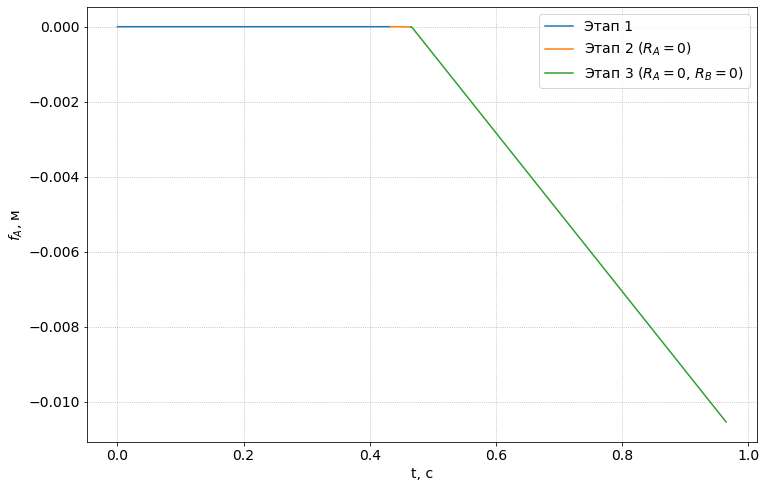

In [90]:
n_f_A=lambdify(state_and_params, f_A)
sol_f_A = [ [ n_f_A(*[*yi,*params.values()]) for yi in sol.y.transpose()] for sol in (sol_1,sol_2,sol_3) ]

plt.plot(sol_1.t, sol_f_A[0]);
plt.plot(sol_2.t, sol_f_A[1]);
plt.plot(sol_3.t, sol_f_A[2]);
plt.xlabel('t, c');
plt.ylabel('$f_A$, м');
plt.grid(linestyle=':')
plt.legend(['Этап 1','Этап 2 ($R_A=0$)','Этап 3 ($R_A=0$, $R_B=0$)']);

# Уравнение связи fa = 0 работает на первом этапе 

#### Перемещение точки $z_B$

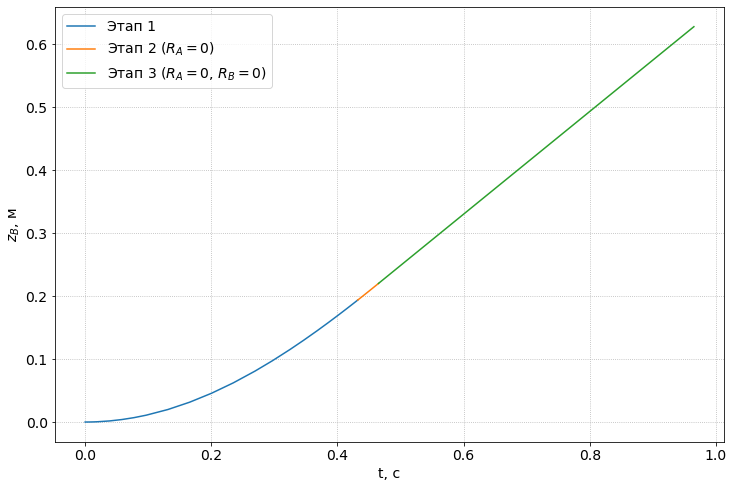

In [91]:
sol_zb = [ [ n_zb(*[*yi,*params.values()]) for yi in sol.y.transpose()] for sol in (sol_1,sol_2,sol_3) ]

plt.plot(sol_1.t, sol_zb[0]);
plt.plot(sol_2.t, sol_zb[1]);
plt.plot(sol_3.t, sol_zb[2]);
plt.xlabel('t, c');
plt.ylabel('$z_B$, м');
plt.grid(linestyle=':')
plt.legend(['Этап 1','Этап 2 ($R_A=0$)','Этап 3 ($R_A=0$, $R_B=0$)']);

# Уравнение связи fa = 0 работает на первом этапе 

#### Сила толкателя, действующая на наноспутник

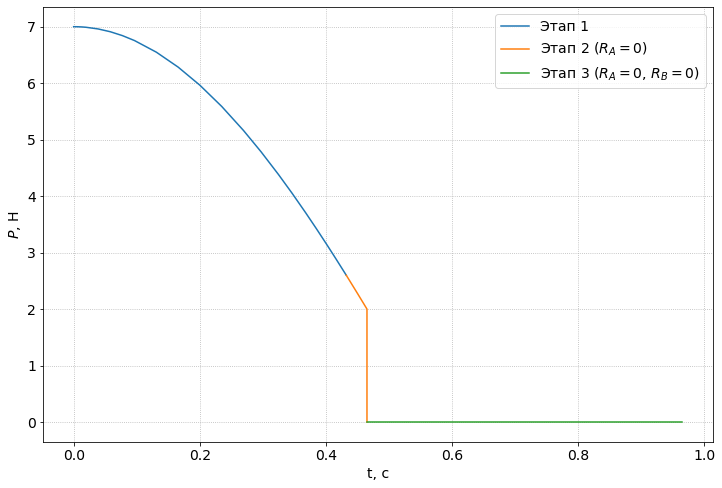

In [92]:
n_P = lambdify(state_and_params, P)

sol_P = [ [ n_P(*[*yi,*params.values()]) for yi in sol.y.transpose()] for sol in (sol_1,sol_2,sol_3) ]

plt.plot(sol_1.t, sol_P[0]);
plt.plot(sol_2.t, sol_P[1]);
plt.plot(sol_3.t, sol_P[2]);
plt.xlabel('t, c');
plt.ylabel('$P$, Н');
plt.grid(linestyle=':')
plt.legend(['Этап 1','Этап 2 ($R_A=0$)','Этап 3 ($R_A=0$, $R_B=0$)']);